# Demo of the Rig Veda API

Documentation for the API is at https://app.sheetlabs.com/#/services/doc/RV/rv.

To run the demo, on the menu bar, click **Cell** > **Run All**. The code output is generated and displayed below each of the questions. Scroll :-)

In [1]:
import json
import requests
import urllib
import matplotlib.pyplot as plt
import collections

base_URL='https://sheetlabs.com/RV/rv'
r = requests.get(base_URL)

json_data = json.loads(json.dumps(r.json()))


#### How many verses does the Rig Veda contain?

In [2]:
print ('Total verses:',len(json_data))

Total verses: 3026


#### Which book has how many verses?

Book 1 has 524 verses.
Book 2 has 119 verses.
Book 3 has 165 verses.
Book 4 has 116 verses.
Book 5 has 322 verses.
Book 6 has 263 verses.
Book 7 has 303 verses.
Book 8 has 311 verses.
Book 9 has 186 verses.
Book 10 has 717 verses.
Total 10 books (mandalas) and 3026 verses (suktas).


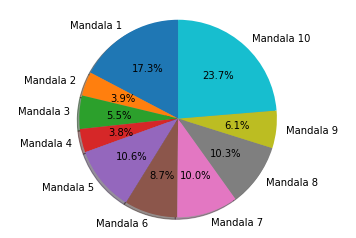

In [3]:
last_book=json_data[(len(json_data))-1]['mandal']
i=1
counter=0
big_sum=0

book_verse=[]
book_number=[]

while i<last_book+1:
    for item in json_data:
        for k,v in item.items():
            if k=='mandal':
                if v==i:
                    counter=counter+1
    print ('Book',i,'has',counter,'verses.')
    book_verse.append(counter)
    mandal='Mandala '+str(i)
    book_number.append(mandal)
    big_sum=big_sum+counter
    counter=0
    i=i+1
print ('Total',last_book,'books (mandalas) and',big_sum,'verses (suktas).')

fig1, ax1 = plt.subplots()
ax1.pie(book_verse, labels=book_number, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#### To whom are the first and last verses addressed to?

In [4]:
first = json_data[0]
last = json_data[(len(json_data))-1]
for k, v in first.items():
    if k=='sungfor':
        print('The first verse is for',v)
for k, v in last.items():
    if k=='sungfor':
        print('The last verse is for',v)


The first verse is for Agni
The last verse is for Agni


#### Who all are the poets?

Total poets: 356


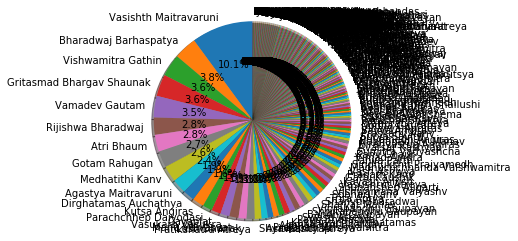

In [5]:
poets=[]
poet_poemcount=[]

unique_poets = collections.Counter(poet['sungby'] for poet in json_data)
print ('Total poets:',len(unique_poets))
print('=================')
poet_list=unique_poets.most_common()
for k,v in poet_list:
    #print(k,v)
    poets.append(k)
    poet_poemcount.append(v)

fig1, ax1 = plt.subplots()
ax1.pie(poet_poemcount, labels=poets, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#### And who were they singing to?

Total gods: 230


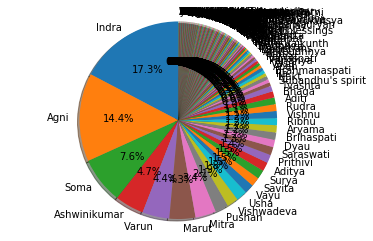

In [6]:
gods=[]
god_poemcount=[]

unique_gods = collections.Counter(god['sungfor'] for god in json_data)
print ('Total gods:',len(unique_gods))
print('=================')
god_list=unique_gods.most_common()
for k,v in god_list:
    gods.append(k)
    god_poemcount.append(v)

fig1, ax1 = plt.subplots()
ax1.pie(god_poemcount, labels=gods, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()